In [60]:
import numpy as np
import csv
from matplotlib import pyplot as plt

testing_sequence_round_4 = ["3 layers of 7oz","3 layers of 7oz",
                            "3 layers of 9.3oz","3 layers of 9.3oz",
                            "3 layers of 10oz","3 layers of 10oz",
                            "3 layers of 12oz","3 layers of 12oz",
                            "4 layers of 7oz","4 layers of 7oz",
                            "4 layers of 9.3oz","4 layers of 9.3oz",
                            "4 layers of 10oz","4 layers of 10oz",
                            "4 layers of 12oz","4 layers of 12oz"
                           ]
t = [0.0017,0.0017,0.00195,0.00195,0.00215,0.00215,0.00215,0.00215,
     0.00205,0.00205,0.00265,0.00265,0.0027,0.0027,0.00275,0.00275]
w = 0.04
g = 9.81
l = 100

layer_3_instron_data = []
layer_4_instron_data = []

def process_csv_files(layers):
    all_instron_data = []
    # extract the row from the csv file and then pull out the numbers
    for h in range(1,9):
        counter = 0
        file_name = "instron_data_2018.01.18/composite_testing_round_4_" + str(layers) + "_layers/Specimen_RawData_" + str(h) + ".csv"
        with open(file_name, 'r') as csvfile:
            csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            instron_data_np = []
            instron_data_str = []
            for row in csvreader:
                counter += 1
                r =  ', '.join(row)
                instron_data_str.append(r)
        
        for i in range(2,len(instron_data_str)):
            extract = np.fromstring(instron_data_str[i].replace('"',''), dtype=float, sep=", ")
            instron_data_np.append(extract) 
        #print(np.shape(instron_data_np))
        print(str(file_name) + ' has ' + str(counter) + " data points")
        all_instron_data.append(instron_data_np[-700:])
        # would have turned this into a np.array here but there are different numbers of data points in each .csv file
    return all_instron_data
layer_3_instron_data = process_csv_files(3)
layer_4_instron_data = process_csv_files(4)
print(len(layer_4_instron_data))


instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_1.csv has 1203 data points
instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_2.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_3.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_4.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_5.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_6.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_7.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_3_layers/Specimen_RawData_8.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_4_layers/Specimen_RawData_1.csv has 1204 data points
instron_data_2018.01.18/composite_testing_round_4_4_layers/Specimen_RawDa

In [68]:
def plot_instron_data(d):
    t1 = "Instron testing"
    font = {'color':  '#39393d',
        'weight': 'light',
        'size': 15,        }
    cols = ['#ff0000','#ff0000','#ffbf00','#ffbf00','#00ff00','#00ff00','#0040ff','#0040ff','#bf00ff','#bf00ff','#ff0080','#ff0080','#008500','#008500','#ff8000','#ff8000']
    print(len(cols))
    fig = plt.figure(figsize=(15,10), facecolor="white")
    ax = fig.add_subplot(111)
    ax.set_title(t1, fontdict=font)
    ax.set_xlabel('Extension (mm)',fontdict=font)
    ax.set_ylabel('Load (kgf)',fontdict=font)
    for i in range(len(all_instron_data)):
        data = np.array(all_instron_data[i])
        # turning data into stress and strain while plotting below
        ax.plot(data[:,1]/100,data[:,2],color=cols[i],label=testing_sequence_round_4[i])
    plt.legend()
    plt.show()
all_instron_data = []
all_instron_data = layer_3_instron_data + layer_4_instron_data
plot_instron_data(all_instron_data)


16


In [69]:
test_x = np.array(layer_3_instron_data[0])
x = test_x[:,1]/100
test_y = np.array(layer_3_instron_data[0])
y = test_y[:,2]

# calculate stiffness
def fit_function(x,y,n):
    N = n
    M = 2
    A = []
    x = np.array(x)
    A = np.dstack((np.ones(n),x))
    U,s,V = np.linalg.svd(A[0], full_matrices=True)
    V = V.T
    w_inv = np.array([1/wi if wi!=0 else 0 for wi in s])
    S = np.zeros((2,n)); S[:2,:2] = np.diag(w_inv)
    v = np.dot(V,np.dot(S,U.T))
    b = np.dot(v,y)
    return b
    # b is the values of the fitted line at x=0 and x=1, therefore the sum of the b values is the gradient

def plot_line_and_fit(x,y,b):
    t1 = "Plot to demonstrate that fitting function is working properly"
    font = {'color':  '#39393d',
        'weight': 'light',
        'size': 14,
        }
    cols = cols = ['#cc33ff', '#33cc33', '#6666ff', '#ff0066', '#00cc99', '#0066ff']
    fig = plt.figure(figsize=(10,10), facecolor="white")
    ax1 = fig.add_subplot(211)
    ax1.set_title(t1, fontdict=font)
    ax1.set_xlabel('Extension (mm)',fontdict=font)
    ax1.set_ylabel('Load (kgf)',fontdict=font)
    ax1.plot(x,y)
    ax1.plot([0,1],b)
    ax1.set_xlim([x[0],x[-1]])
    ax1.set_ylim([y[0],y[-1]])
    plt.show()

output = fit_function(x,y,700)
plot_line_and_fit(x,y,output)

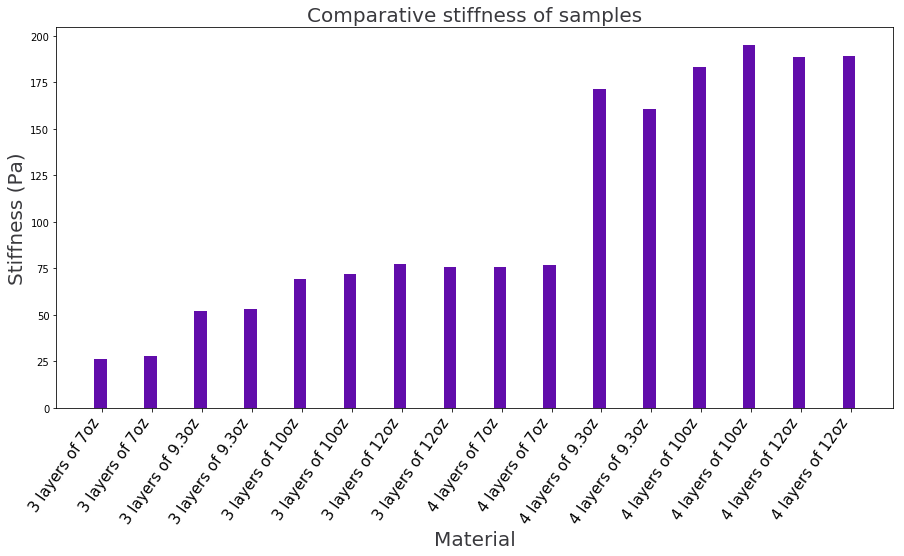

In [70]:
def calculating_gradients(data):
    gradients = []
    for i in range(len(data)):
        # extract each samples data from all_instron_data and turn into a numpy array
        sample_data = np.array(data[i])
        # divide extension by length to get strain
        x = sample_data[:,1]/l
        # multiply load in kgf by 9.81 to get load in Newtons, then divde by area to get stress
        y = sample_data[:,2]*(g/w*t[i])
        # get gradient of the data
        b = fit_function(x,y,700)
        # b is the y values for the line at x=0 and x=1 so summing them gives the gradient
        gradients.append(sum(b))
    return gradients

def plot_stiffness(gradients):
    t1 = "Comparative stiffness of samples"
    font = {'color':  '#39393d',
        'weight': 'light',
        'size': 20,}
    fig = plt.figure(figsize=(15,7), facecolor="white")
    ax = fig.add_subplot(111)
    ax.set_title(t1, fontdict=font)
    ax.set_xlabel('Material',fontdict=font)
    ax.set_ylabel('Stiffness (Pa)',fontdict=font)
    ind = np.arange(len(gradients))
    width = 0.25 
    rects = ax.bar(ind, gradients, width, color='#610dab',label=testing_sequence_round_4)
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in rects]
    plt.xticks(xticks_pos, testing_sequence_round_4,  ha='right', rotation=55, fontsize=15)
    plt.show()

gradients = calculating_gradients(all_instron_data)
plot_stiffness(gradients)